## Making a suitable data structure for temporal graphs

Class `TGraph` is as follows. Needs refinement with weight calculation.

In [ ]:
import math
import numpy as np
from collections import defaultdict
from tabulate import tabulate

In [ ]:
class TGraph:
    def __init__(self):
        self.graph = defaultdict(list)

    # This definition is for the undirected case, this is just to compute the weights of the edges.
    def addEdge(self,u,v,t):
        self.graph[u].append((v,t))
        self.graph[v].append((u,t))
    # Ok the above doesn't work (its not that simple)

    # If the edges are keys, easier to compute weights, but the complexity is O(|E|^2)

    def addEdgedict(self,u,v,t,wt = np.inf):
        self.graph[(u,v)] = [t,wt]

    def getAdjacent(self,edge):
        adj_edges = []
        (u,v) = edge
        for e in self.graph.keys():
            if u in e or v in e:
                if (u,v) == e: continue
                adj_edges.append(e)
        return adj_edges

    def assignWeights(self):
        # queue = []
        # queue.append(s)
        # self.visited.append(s)

        # while queue:
        #     s = queue.pop(0)

        #     for i in self.graph[s]:
        #         # edge = (s,i[0])
        #         for j in self.graph[i[0]]:
        #             if j[0] == s: continue
        #             # edge = (i[0],j[0])
        #             if i[2] > abs(i[1]-j[1]):
        #                 i[2] = abs(i[1]-j[1])

        for edge in self.graph.keys():
            adj_edges = self.getAdjacent(edge)
            for adj in adj_edges:
                if self.graph[edge][1] > abs(self.graph[edge][0] - self.graph[adj][0]):
                    self.graph[edge][1] = abs(self.graph[edge][0] - self.graph[adj][0])

        # this works fine, but the complexity is more in this case.

    def assignWeights_list(self):
        wt_dict = {}
        for edge in self.graph.keys():
            for nbr_edge, time_label in self.graph[edge]:
                wt_dict[(edge,nbr_edge)] = np.inf
                for nbr_edge1, nbr_time in (list(self.graph[nbr_edge]) + list(self.graph[edge])):
                    if nbr_edge1 == nbr_edge: continue
                    if wt_dict[(edge,nbr_edge)] > abs(time_label - nbr_time):
                        wt_dict[(edge,nbr_edge)] = abs(time_label - nbr_time)
        return wt_dict

    # problem with adjacency list, sense of direction also there, so can't normally get the adjacent edges. Will have to somehow incorporate the bidirectional adjacent edges to compute the weights.


    def __str__(self) -> str:
        # wt_dict = self.assignWeights_list()
        # for vert in self.graph.keys():
        #     for nbr in self.graph[vert]:
        #         print(f"Edge = {vert,nbr[0]}, Time Label = {nbr[1]}, Weight = {wt_dict[(vert,nbr[0])]}")
        s = [["Edge","Time Label","Weight"]]
        for edge in self.graph.keys():
            s.append([edge,self.graph[edge][0],self.graph[edge][1]])
        return (tabulate(s,headers='firstrow',tablefmt='grid'))

## Testing the code

### Generation of sample Temporal Graph

Simple code to generate random edges with labels `'a'` to `'z'`, and time labels. Result is a directed graph.

In [ ]:
import random

random.seed(17)

letters = [chr(x) for x in range(97,123)]
labels = range(1,101)

with open("tgraph_sample.txt", "w") as f:
    for _ in range(100):
        s = random.sample(letters,2)
        f.write(f"{s[0]} {s[1]} {random.choice(labels)}\n")
    print("Writing Completed")
    f.close()

Writing Completed


In [ ]:
# Reading from file, to add edges in the data structure.

def filetolist(file):
    edge_list = []
    with open(file,"r") as f:
        L = f.readlines()
    for edge in L:
        e = edge.split(" ")
        e[2] = int(e[2])
        edge_list.append(e)
    return edge_list

In [ ]:
# Preliminary small sample testing, this is for the case when the edges are keys.

tg_test = TGraph()
tg_test.addEdgedict('a','b',2)
tg_test.addEdgedict('b','c',72)
tg_test.addEdgedict('c','d',89)
tg_test.addEdgedict('d','a',100)

tg_test.assignWeights()

print(tg_test)

+------------+--------------+----------+
| Edge       |   Time Label |   Weight |
+============+==============+==========+
| ('a', 'b') |            2 |       70 |
+------------+--------------+----------+
| ('b', 'c') |           72 |       17 |
+------------+--------------+----------+
| ('c', 'd') |           89 |       11 |
+------------+--------------+----------+
| ('d', 'a') |          100 |       11 |
+------------+--------------+----------+


In [ ]:
# Now for the case of the adjacency list.

tg_test1 = TGraph()
tg_test1.addEdge('a','b',2)
tg_test1.addEdge('b','c',72)
tg_test1.addEdge('c','d',89)
tg_test1.addEdge('d','a',100)

# tg_test.assignWeights()

print(tg_test1)

+--------+--------------+------------+
| Edge   | Time Label   | Weight     |
+========+==============+============+
| a      | ('b', 2)     | ('d', 100) |
+--------+--------------+------------+
| b      | ('a', 2)     | ('c', 72)  |
+--------+--------------+------------+
| c      | ('b', 72)    | ('d', 89)  |
+--------+--------------+------------+
| d      | ('c', 89)    | ('a', 100) |
+--------+--------------+------------+


In [ ]:
tg = TGraph()

edges = filetolist("tgraph_sample.txt")

print(edges)

for edge in edges:
    [u,v,t] = edge
    tg.addEdgedict(u,v,t)

[['q', 'n', 39], ['l', 'j', 23], ['y', 'w', 91], ['r', 'v', 36], ['d', 'a', 32], ['m', 'x', 54], ['i', 'q', 41], ['u', 'v', 93], ['m', 'e', 71], ['b', 'e', 26], ['e', 'w', 69], ['r', 'z', 88], ['g', 'k', 70], ['d', 'w', 82], ['c', 'j', 53], ['c', 'q', 61], ['u', 't', 19], ['v', 'z', 53], ['q', 'k', 3], ['n', 'l', 74], ['b', 'y', 95], ['l', 'b', 62], ['l', 's', 100], ['a', 'm', 31], ['d', 'r', 28], ['h', 'q', 47], ['b', 'i', 9], ['z', 'i', 25], ['x', 't', 72], ['r', 'e', 33], ['v', 'j', 45], ['k', 'f', 43], ['d', 's', 75], ['z', 'i', 43], ['a', 'b', 97], ['l', 'a', 60], ['x', 'i', 61], ['u', 'b', 94], ['g', 'j', 34], ['c', 'x', 92], ['p', 'a', 80], ['s', 'q', 88], ['e', 'm', 63], ['x', 's', 51], ['f', 'g', 33], ['e', 'v', 15], ['g', 'b', 69], ['j', 'z', 41], ['z', 'k', 7], ['f', 'n', 12], ['w', 'y', 40], ['i', 'v', 52], ['p', 'c', 70], ['c', 'r', 82], ['h', 'r', 34], ['s', 'f', 38], ['b', 'x', 63], ['s', 'm', 63], ['h', 'r', 53], ['q', 'u', 57], ['c', 'o', 97], ['g', 'h', 62], ['k', 'g'

In [ ]:
tg.assignWeights()

print(tg)

+------------+--------------+----------+
| Edge       |   Time Label |   Weight |
+============+==============+==========+
| ('q', 'n') |           39 |        2 |
+------------+--------------+----------+
| ('l', 'j') |           23 |        4 |
+------------+--------------+----------+
| ('y', 'w') |           91 |        4 |
+------------+--------------+----------+
| ('r', 'v') |           36 |        1 |
+------------+--------------+----------+
| ('d', 'a') |           32 |        2 |
+------------+--------------+----------+
| ('m', 'x') |           54 |        3 |
+------------+--------------+----------+
| ('i', 'q') |           41 |        2 |
+------------+--------------+----------+
| ('u', 'v') |           93 |        1 |
+------------+--------------+----------+
| ('m', 'e') |           71 |        2 |
+------------+--------------+----------+
| ('b', 'e') |           26 |        1 |
+------------+--------------+----------+
| ('e', 'w') |           69 |        2 |
+------------+--

# Getting persistence diagrams

In [80]:
import numpy as np
from numpy.random import default_rng
rng = default_rng(42)  # Create a random number generator

from scipy.spatial.distance import pdist, squareform
from scipy.sparse import coo_matrix

from gtda.graphs import GraphGeodesicDistance
from gtda.homology import VietorisRipsPersistence, SparseRipsPersistence, FlagserPersistence

from igraph import Graph

from IPython.display import SVG, display

https://github.com/giotto-ai/giotto-tda/blob/master/examples/persistent_homology_graphs.ipynb

In [ ]:
# Create a single weighted adjacency matrix of a FCW graph
n_vertices = 3
x = np.random.randint(20,size=(n_vertices, n_vertices))
# Fill the diagonal with zeros (not always necessary, see below)
np.fill_diagonal(x, 0)
# x = [[0,70,0,11],[70,0,17,0],[0,17,0,11],[11,0,11,0]]
# x = np.array(x).astype(float)
x

# Create a trivial collection of weighted adjacency matrices, containing x only
X = [x]

# Instantiate topological transformer
VR = VietorisRipsPersistence(metric="precomputed")

# Compute persistence diagrams corresponding to each entry (only one here) in X
diagrams = VR.fit_transform(X)

print(f"diagrams.shape: {diagrams.shape} ({diagrams.shape[1]} topological features)")

diagrams.shape: (1, 2, 3) (2 topological features)


In [ ]:
x

array([[ 0,  6, 12],
       [ 3,  0,  0],
       [15,  0,  0]])

In [ ]:
x = np.array([[ 0, 12, 200,  3],
              [ 12,  0, 10, 100],
              [ 200, 10,  0,  7],
              [ 3,  100,  7,  0]])

X = [Ad]

# Instantiate topological transformer
VR = VietorisRipsPersistence(metric="precomputed")

# Compute persistence diagrams corresponding to each entry (only one here) in X
diagrams = VR.fit_transform(X)

print(f"diagrams.shape: {diagrams.shape} ({diagrams.shape[1]} topological features)")

diagrams.shape: (1, 5, 3) (5 topological features)


In [ ]:
diagrams

array([[[ 0., 17.,  0.],
        [ 0., 17.,  0.],
        [ 0., 29.,  0.],
        [ 0., 42.,  0.],
        [ 0.,  0.,  1.]]])

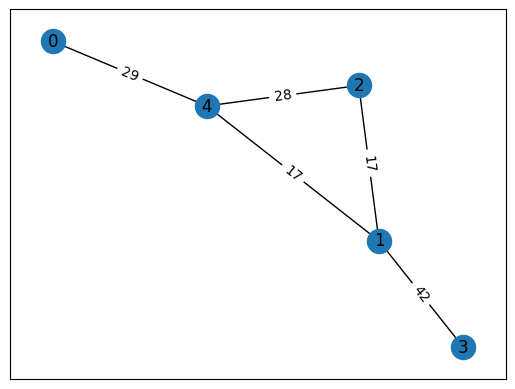

In [ ]:
draw_with_labels(Gw,'weight')

In [ ]:
from gtda.plotting import plot_diagram

plot_diagram(diagrams[0])

In [ ]:
diagrams = np.array([[[0., 1., 0],
                      [0., 2., 0],
                      [0., 2., 0],
                      [0., 3., 0],
                      [0., 4., 0],
                      [0., 5., 0],
                      [0., 6., 0],
                      [0., 7., 0],
                      [3., 5., 1],
                      [8., np.inf, 1],
                      [8., np.inf, 1]]])

plot_diagram(diagrams[0])

# Gudhi Code

In [18]:
import numpy as np
import pandas as pd
import gudhi as gd
from sklearn import manifold
from pylab import *
%matplotlib inline
# import sklearn_tda

In [ ]:
D0 = np.array([[ 0, 12, 0,  3],
              [ 12,  0, 10, 15],
              [ 0, 10,  0,  7],
              [ 3,  15,  7,  0]])

D0 = pd.DataFrame(D0)


In [ ]:
D0

,0,1,2,3
0,0,12,0,3
1,12,0,10,15
2,0,10,0,7
3,3,15,7,0


In [ ]:
path_file = ""
files_list = [
    '1anf.corr_1.txt',
    # '1ez9.corr_1.txt',
    # '1fqa.corr_2.txt',
    # '1fqb.corr_3.txt',
    # '1fqc.corr_2.txt',
    # '1fqd.corr_3.txt',
    # '1jw4.corr_4.txt',
    # '1jw5.corr_5.txt',
    # '1lls.corr_6.txt',
    # '1mpd.corr_4.txt',
    # '1omp.corr_7.txt',
    # '3hpi.corr_5.txt',
    # '3mbp.corr_6.txt',
    # '4mbp.corr_7.txt'
]

corr_list = [pd.read_csv(path_file + u,
                         header = None,
                         delim_whitespace = True) for u in files_list]

dist_list = [ 1- np.abs(c) for c in corr_list]

In [ ]:
dist_list

[          0         1         2         3         4         5         6    \
 0    0.000000  0.076200  0.171364  0.378207  0.461747  0.493499  0.478665   
 1    0.076200  0.000000  0.122763  0.233837  0.350744  0.406213  0.425202   
 2    0.171364  0.122763  0.000000  0.084642  0.131528  0.148980  0.162259   
 3    0.378207  0.233837  0.084642  0.000000  0.045478  0.132107  0.217299   
 4    0.461747  0.350744  0.131528  0.045478  0.000000  0.059280  0.146850   
 ..        ...       ...       ...       ...       ...       ...       ...   
 365  0.686334  0.808770  0.740322  0.856491  0.874522  0.876637  0.828395   
 366  0.640850  0.754748  0.667525  0.797437  0.804538  0.784507  0.725084   
 367  0.617944  0.730646  0.653546  0.781044  0.779865  0.764810  0.708232   
 368  0.695108  0.804961  0.742430  0.842591  0.841695  0.847983  0.810339   
 369  0.748451  0.848953  0.766030  0.858435  0.849836  0.845652  0.810207   
 
           7         8         9    ...       360       361   

In [ ]:
D0 = dist_list[0]


In [ ]:
D0

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,0.000000,0.076200,0.171364,0.378207,0.461747,0.493499,0.478665,0.432338,0.568455,0.639504,...,0.694159,0.723059,0.660802,0.614051,0.660601,0.686334,0.640850,0.617944,0.695108,0.748451
1,0.076200,0.000000,0.122763,0.233837,0.350744,0.406213,0.425202,0.381799,0.541636,0.646580,...,0.817461,0.844610,0.781266,0.740222,0.793586,0.808770,0.754748,0.730646,0.804961,0.848953
2,0.171364,0.122763,0.000000,0.084642,0.131528,0.148980,0.162259,0.164105,0.333175,0.480605,...,0.782234,0.813481,0.718610,0.666239,0.742311,0.740322,0.667525,0.653546,0.742430,0.766030
3,0.378207,0.233837,0.084642,0.000000,0.045478,0.132107,0.217299,0.293902,0.494307,0.675635,...,0.913930,0.929677,0.853475,0.813717,0.868041,0.856491,0.797437,0.781044,0.842591,0.858435
4,0.461747,0.350744,0.131528,0.045478,0.000000,0.059280,0.146850,0.297257,0.511751,0.734412,...,0.967195,0.979578,0.889375,0.841519,0.895967,0.874522,0.804538,0.779865,0.841695,0.849836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.686334,0.808770,0.740322,0.856491,0.874522,0.876637,0.828395,0.785266,0.760684,0.737995,...,0.226047,0.152656,0.101207,0.083466,0.030617,0.000000,0.036028,0.066943,0.086245,0.105969
366,0.640850,0.754748,0.667525,0.797437,0.804538,0.784507,0.725084,0.684806,0.668724,0.673082,...,0.300218,0.248775,0.131602,0.079803,0.087830,0.036028,0.000000,0.029610,0.098954,0.089094
367,0.617944,0.730646,0.653546,0.781044,0.779865,0.764810,0.708232,0.694667,0.695173,0.726602,...,0.398335,0.343378,0.232286,0.143787,0.107557,0.066943,0.029610,0.000000,0.043067,0.067151
368,0.695108,0.804961,0.742430,0.842591,0.841695,0.847983,0.810339,0.810385,0.811014,0.831445,...,0.500436,0.406984,0.335289,0.263311,0.145800,0.086245,0.098954,0.043067,0.000000,0.035273


In [ ]:
D0sub = D0.values[np.ix_([0,1,2,3],[0,1,2,3])]

In [ ]:
D0sub

array([[0.        , 0.07620041, 0.17136432, 0.37820691],
       [0.07620041, 0.        , 0.1227626 , 0.23383716],
       [0.17136432, 0.1227626 , 0.        , 0.08464198],
       [0.37820691, 0.23383716, 0.08464198, 0.        ]])

In [ ]:
D0sub[0,2] = D0sub[2,0] = D0sub[1,3] = D0sub[3,1] = 200

In [ ]:
D0sub

array([[0.0000000e+00, 7.6200410e-02, 2.0000000e+02, 3.7820691e-01],
       [7.6200410e-02, 0.0000000e+00, 1.2276260e-01, 2.0000000e+02],
       [2.0000000e+02, 1.2276260e-01, 0.0000000e+00, 8.4641980e-02],
       [3.7820691e-01, 2.0000000e+02, 8.4641980e-02, 0.0000000e+00]])

In [ ]:
D0sub1 = np.array([[0.        , 0.07620041, 0., 0.37820691],
                    [0.07620041, 0.        , 0.1227626 , 0.],
                    [0., 0.1227626 , 0.        , 0.08464198],
                    [0.37820691, 0., 0.08464198, 0.        ]])

In [ ]:
D0sub1

array([[0.        , 0.07620041, 0.        , 0.37820691],
       [0.07620041, 0.        , 0.1227626 , 0.        ],
       [0.        , 0.1227626 , 0.        , 0.08464198],
       [0.37820691, 0.        , 0.08464198, 0.        ]])

In [ ]:
skeleton_protein0 = gd.RipsComplex(
    distance_matrix = Ad,
    max_edge_length = 1
)

Rips_simplex_tree_protein0 = skeleton_protein0.create_simplex_tree(max_dimension = 2)

In [ ]:
BarCodes_Rips0 = Rips_simplex_tree_protein0.persistence()


In [ ]:
Rips_simplex_tree_protein0.persistence_intervals_in_dimension(0)

array([[0.        , 0.07620041],
       [0.        , 0.08464198],
       [0.        , 0.1227626 ],
       [0.        ,        inf]])

In [ ]:
Rips_simplex_tree_protein0.persistence_intervals_in_dimension(1)

array([], shape=(0, 2), dtype=float64)

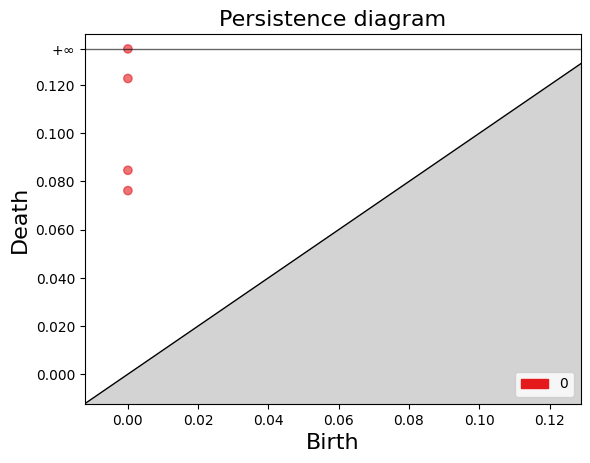

In [ ]:
gd.plot_persistence_diagram(BarCodes_Rips0);

# Now trying with networkx

Making a new class for temporal graph, with the graph being stored in a .gml file readable to networkx

In [176]:
# Generating random time labelled undirected graph.

import random
import networkx as nx

G1 = nx.complete_graph(6)

for (u,v) in G1.edges():
    G1.edges[u,v]['time'] = random.randint(0,100)

In [177]:
A = nx.adjacency_matrix(G1, weight = 'time')
A.todense()

array([[ 0,  1, 94, 89, 16,  6],
       [ 1,  0, 87, 71, 90, 64],
       [94, 87,  0, 30, 42, 67],
       [89, 71, 30,  0, 25, 72],
       [16, 90, 42, 25,  0, 15],
       [ 6, 64, 67, 72, 15,  0]])

In [67]:
import networkx as nx
import numpy as np

In [198]:
A2 = np.array([[ 0,  1, 91, 89, 14,  8],
               [ 1,  0, 87, 71, 90, 64],
               [91, 87,  0, 30, 42, 67],
               [89, 71, 30,  0, 25, 72],
               [14, 90, 42, 25,  0, 15],
               [ 8, 64, 67, 72, 15,  0]])

rows, cols = np.where(A2 != 0)
edges = list(zip(rows.tolist(), cols.tolist()))

print(edges)

G2 = nx.Graph()

G2.add_edges_from(edges)

for (u,v) in edges:
    G2.edges[u,v]['time'] = A2[u,v]

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4)]


In [65]:
# Exporting G to .gml file

nx.write_gml(G3,'Graph3.gml')

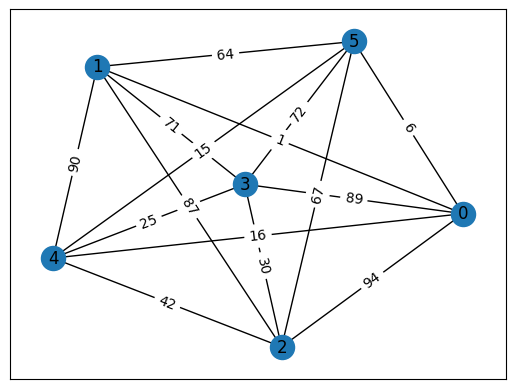

In [178]:
def draw_with_labels(G,label):
    pos=nx.spring_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,label)
    nx.draw_networkx_edge_labels(G,pos,edge_labels = labels)

draw_with_labels(G1,'time')

In [85]:
# Slightly changing the graph

G2 = G1

G2.remove_edge(6,4)
G2.add_edge(3,4,time=50)

In [52]:
nx.write_gml(G2,'Graph2.gml')

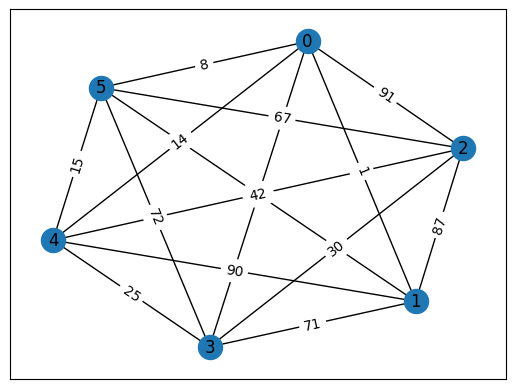

In [199]:
draw_with_labels(G2,'time')

In [ ]:
list(nx.edges(G))
# G.edges[4,0]['time']
list(G.nodes())

[0, 1, 2, 3, 4]

In [70]:
# Utility functions for edge weight calculation
import numpy as np
def assign_weights(G):
    # G is a networkx undirected time labelled graph
    wtG = nx.Graph()
    for edge in G.edges():
        (u,v) = edge
        wt = np.inf
        for nbr in nx.neighbors(G,u):
            if nbr == v: continue
            if abs(G.edges[u,nbr]['time'] - G.edges[u,v]['time']) < wt:
                wt = abs(G.edges[u,nbr]['time'] - G.edges[u,v]['time'])
        for nbr in nx.neighbors(G,v):
            if nbr == u: continue
            if abs(G.edges[v,nbr]['time'] - G.edges[u,v]['time']) < wt:
                wt = abs(G.edges[v,nbr]['time'] - G.edges[u,v]['time'])
        wtG.add_edge(u,v,weight=wt)
    return wtG

In [200]:
Gw1 = assign_weights(G1)

In [201]:
Gw2 = assign_weights(G2)

In [106]:
Gw2.add_edge(0,1,weight=40)

In [140]:
Gw2.remove_edge(0,1)
Gw2.add_edge(0,1,weight=4000)

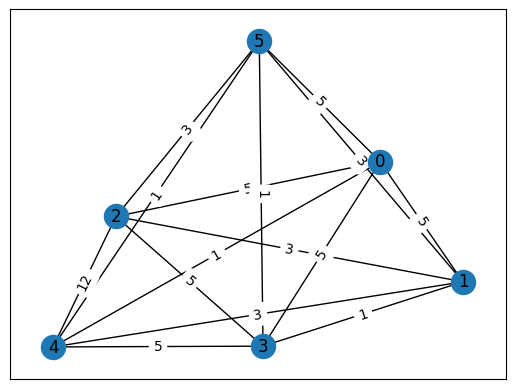

In [202]:
draw_with_labels(Gw1,'weight')

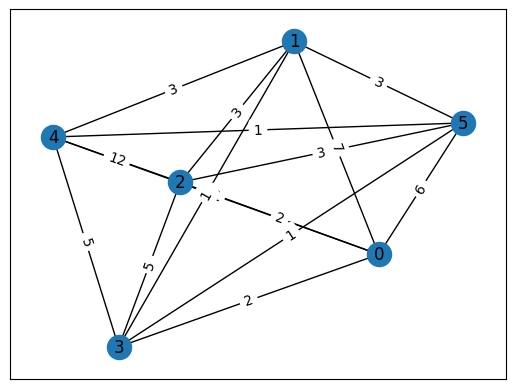

In [203]:
draw_with_labels(Gw2,'weight')

In [143]:
A = nx.adjacency_matrix(Gw2, weight = 'weight')
A.todense()

array([[   0,   10,   10, 4000,    0,    0,    0],
       [  10,    0,    0,    9,   15,   16,    0],
       [  10,    0,    0,   36,    0,    0,    0],
       [4000,    9,   36,    0,    0,    9,   38],
       [   0,   15,    0,    0,    0,   16,    0],
       [   0,   16,    0,    9,   16,    0,   11],
       [   0,    0,    0,   38,    0,   11,    0]])

In [144]:
A1 = np.array([[   0,   10,   10, 4000,    0,    0,    0],
       [  10,    0,    0,    9,   15,   16,    0],
       [  10,    0,    0,   37,    0,    0,    0],
       [4000,    9,   37,    0,    0,    9,   38],
       [   0,   15,    0,    0,    0,   16,    0],
       [   0,   16,    0,    9,   16,    0,   11],
       [   0,    0,    0,   38,    0,   11,    0]])

rows, cols = np.where(A1 != 0)
edges = list(zip(rows.tolist(), cols.tolist()))

print(edges)

Gw2_e = nx.Graph()

Gw2_e.add_edges_from(edges)

for (u,v) in edges:
    Gw2_e.edges[u,v]['weight'] = A1[u,v]

[(0, 1), (0, 2), (0, 3), (1, 0), (1, 3), (1, 4), (1, 5), (2, 0), (2, 3), (3, 0), (3, 1), (3, 2), (3, 5), (3, 6), (4, 1), (4, 5), (5, 1), (5, 3), (5, 4), (5, 6), (6, 3), (6, 5)]


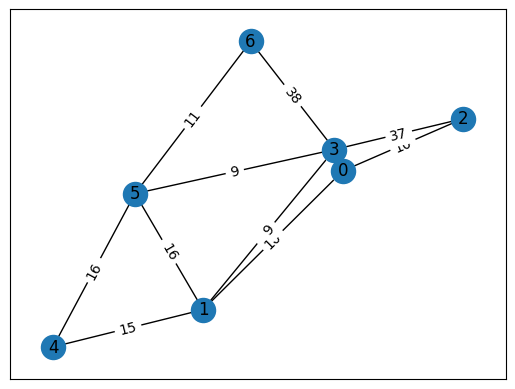

In [145]:
draw_with_labels(Gw2_e,'weight')

In [11]:
nx.write_gml(Gw,'Graph1_weights.gml')

In [47]:
nx.write_gml(Gw2,'Graph2_weights.gml')

In [161]:
def adj_fillinf(Gw):
    Aw = nx.adjacency_matrix(Gw,weight = 'weight')
    Ad = Aw.todense().astype(np.float64)
    Ad[Ad == 0] = np.inf
    # Ad[Ad == 4000] = np.inf
    np.fill_diagonal(Ad,0)
    return Ad

# Ad1 = adj_fillinf(Gw1)

In [205]:
Ad1 = adj_fillinf(Gw1)
Ad1

array([[ 0.,  5.,  5.,  5.,  1.,  5.],
       [ 5.,  0.,  3.,  1.,  3.,  3.],
       [ 5.,  3.,  0.,  5., 12.,  3.],
       [ 5.,  1.,  5.,  0.,  5.,  1.],
       [ 1.,  3., 12.,  5.,  0.,  1.],
       [ 5.,  3.,  3.,  1.,  1.,  0.]])

In [206]:
Ad2 = adj_fillinf(Gw2)
Ad2

array([[ 0.,  7.,  2.,  2.,  1.,  6.],
       [ 7.,  0.,  3.,  1.,  3.,  3.],
       [ 2.,  3.,  0.,  5., 12.,  3.],
       [ 2.,  1.,  5.,  0.,  5.,  1.],
       [ 1.,  3., 12.,  5.,  0.,  1.],
       [ 6.,  3.,  3.,  1.,  1.,  0.]])

In [207]:
X = [Ad1,Ad2]

# Instantiate topological transformer
VR = VietorisRipsPersistence(metric="precomputed")

# Compute persistence diagrams corresponding to each entry (only one here) in X
diagrams = VR.fit_transform(X)

print(f"diagrams.shape: {diagrams.shape} ({diagrams.shape[1]} topological features)")

diagrams.shape: (2, 7, 3) (7 topological features)


In [208]:
diagrams

array([[[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 3., 0.],
        [2., 2., 1.],
        [2., 2., 1.]],

       [[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 2., 0.],
        [3., 5., 1.],
        [2., 5., 1.]]])

In [1]:
from gtda.plotting import plot_diagram

plot_diagram(diagrams[0])

NameError: name 'diagrams' is not defined

generating 2 more completely different graphs

In [55]:
import random

G3 = nx.gnm_random_graph(9,12)

for (u,v) in G3.edges():
    G3.edges[u,v]['time'] = random.randint(0,100)

A = nx.adjacency_matrix(G3, weight = 'time')
A.todense()

array([[  0,   0,   0,   0,   0,   0,   0,  41,  31],
       [  0,   0,   0,   0,   0,  57,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  70,  75,   0],
       [  0,   0,   0,   0,  61,  82,   0,  27,   0],
       [  0,   0,   0,  61,   0,   0,  96,  64,   0],
       [  0,  57,   0,  82,   0,   0,   0,   0,   0],
       [  0,   0,  70,   0,  96,   0,   0, 100,  50],
       [ 41,   0,  75,  27,  64,   0, 100,   0,   0],
       [ 31,   0,   0,   0,   0,   0,  50,   0,   0]])

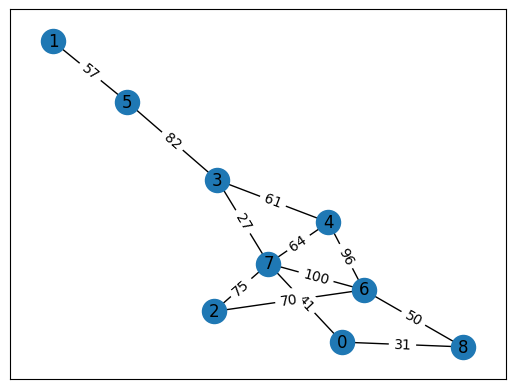

In [58]:
draw_with_labels(G3,'time')

In [59]:
nx.write_gml(G3,'Graph3.gml')

In [60]:
Gw3 = assign_weights(G3)

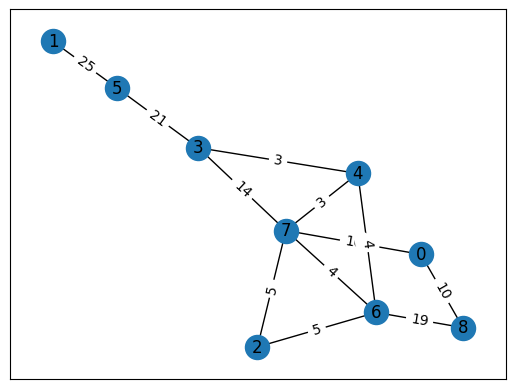

In [61]:
draw_with_labels(Gw3,'weight')

In [62]:
nx.write_gml(Gw3,'Graph3_weights.gml')

In [66]:
Ad3 = adj_fillinf(Gw3)
Ad3

array([[ 0., 10., 10., inf, inf, inf, inf, inf, inf],
       [10.,  0., inf, inf, inf,  5.,  4., 14.,  3.],
       [10., inf,  0., inf, inf, inf, 19., inf, inf],
       [inf, inf, inf,  0., 25., inf, inf, inf, inf],
       [inf, inf, inf, 25.,  0., inf, inf, 21., inf],
       [inf,  5., inf, inf, inf,  0.,  5., inf, inf],
       [inf,  4., 19., inf, inf,  5.,  0., inf,  4.],
       [inf, 14., inf, inf, 21., inf, inf,  0.,  3.],
       [inf,  3., inf, inf, inf, inf,  4.,  3.,  0.]])

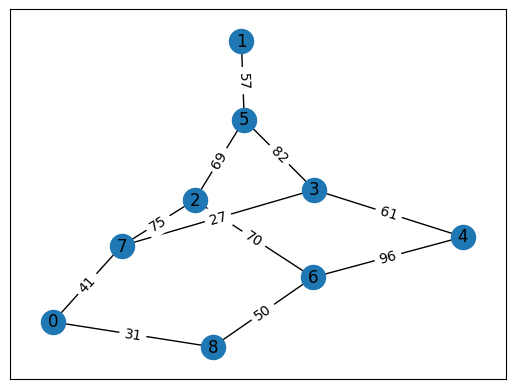

In [66]:
# `making slight changes to G3
G4 = G3
G4.remove_edge(6,7)
G4.remove_edge(4,7)
G4.add_edge(5,2,time=69)

# A = nx.adjacency_matrix(G4, weight = 'time')
# A.todense()

draw_with_labels(G4,'time')
nx.write_gml(G4,'Graph4.gml')

# Gw4 = assign_weights(G4)
# draw_with_labels(Gw4,'weight')
# nx.write_gml(Gw4,'Graph4_weights.gml')

# Ad4 = adj_fillinf(Gw4)
# Ad4

In [109]:
X = [Ad,Ad2,Ad3,Ad4]

# Instantiate topological transformer
VR = VietorisRipsPersistence(metric="precomputed")

# Compute persistence diagrams corresponding to each entry (only one here) in X
diagrams = VR.fit_transform(X)

print(f"diagrams.shape: {diagrams.shape} ({diagrams.shape[1]} topological features)")

print(diagrams)

# plot_diagram(diagrams[0])

diagrams.shape: (4, 11, 3) (11 topological features)
[[[ 0.  9.  0.]
  [ 0.  9.  0.]
  [ 0. 10.  0.]
  [ 0. 10.  0.]
  [ 0. 10.  0.]
  [ 0. 15.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [23. inf  1.]
  [10. inf  1.]
  [10. 10.  1.]]

 [[ 0.  9.  0.]
  [ 0.  9.  0.]
  [ 0. 10.  0.]
  [ 0. 10.  0.]
  [ 0. 11.  0.]
  [ 0. 15.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [36. inf  1.]
  [10. 10.  1.]
  [10. 10.  1.]]

 [[ 0.  3.  0.]
  [ 0.  3.  0.]
  [ 0.  4.  0.]
  [ 0.  5.  0.]
  [ 0. 10.  0.]
  [ 0. 10.  0.]
  [ 0. 21.  0.]
  [ 0. 25.  0.]
  [19. inf  1.]
  [10. 10.  1.]
  [10. 10.  1.]]

 [[ 0.  1.  0.]
  [ 0.  1.  0.]
  [ 0.  5.  0.]
  [ 0. 10.  0.]
  [ 0. 10.  0.]
  [ 0. 12.  0.]
  [ 0. 13.  0.]
  [ 0. 21.  0.]
  [26. inf  1.]
  [19. inf  1.]
  [14. inf  1.]]]


### Comparing persistence diagrams

In [89]:
diag_edited = diagrams

In [90]:
diag_edited

array([[[ 0.,  9.,  0.],
        [ 0.,  9.,  0.],
        [ 0., 10.,  0.],
        [ 0., 10.,  0.],
        [ 0., 10.,  0.],
        [ 0., 15.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [23., inf,  1.],
        [10., inf,  1.],
        [10., 10.,  1.]],

       [[ 0.,  9.,  0.],
        [ 0.,  9.,  0.],
        [ 0., 10.,  0.],
        [ 0., 10.,  0.],
        [ 0., 11.,  0.],
        [ 0., 15.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [36., inf,  1.],
        [10., 10.,  1.],
        [10., 10.,  1.]],

       [[ 0.,  3.,  0.],
        [ 0.,  3.,  0.],
        [ 0.,  4.,  0.],
        [ 0.,  5.,  0.],
        [ 0., 10.,  0.],
        [ 0., 10.,  0.],
        [ 0., 21.,  0.],
        [ 0., 25.,  0.],
        [19., inf,  1.],
        [10., 10.,  1.],
        [10., 10.,  1.]],

       [[ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  5.,  0.],
        [ 0., 10.,  0.],
        [ 0., 10.,  0.],
        [ 0., 12.,  0.],
        [ 0., 13., 

In [91]:
diag_edited[0][diag_edited[0] == np.inf] = 10000
diag_edited[1][diag_edited[1] == np.inf] = 10000
diag_edited[2][diag_edited[2] == np.inf] = 10000
diag_edited[3][diag_edited[3] == np.inf] = 10000

In [2]:
from gtda.diagrams import PairwiseDistance

PD = PairwiseDistance(metric='bottleneck')

dist = PD.fit_transform(diagrams)

NameError: name 'diagrams' is not defined

In [212]:
dist

array([[0.        , 1.80277564],
       [1.80385977, 0.        ]])

### Now trying with Gudhi

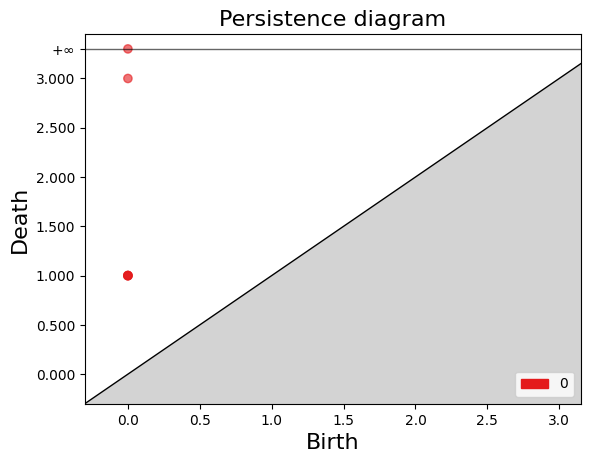

In [214]:
import gudhi as gd
skeleton_protein1 = gd.RipsComplex(
    distance_matrix = Ad1,
    max_edge_length = 5000
)

Rips_simplex_tree_protein1 = skeleton_protein1.create_simplex_tree(max_dimension = 3)

BarCodes_Rips1 = Rips_simplex_tree_protein1.persistence()

gd.plot_persistence_diagram(BarCodes_Rips1);

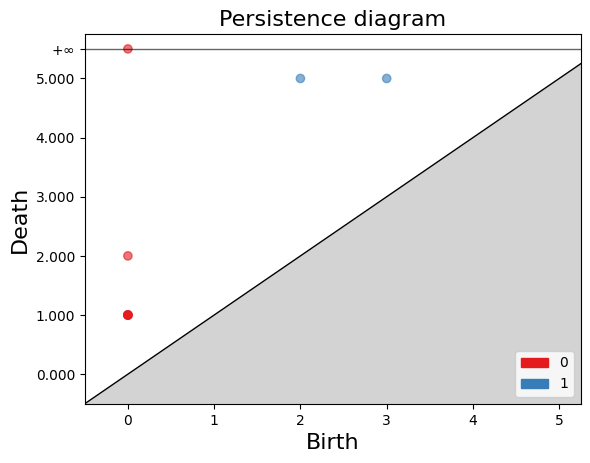

In [215]:
skeleton_protein2 = gd.RipsComplex(
    distance_matrix = Ad2,
    max_edge_length = 5000
)

Rips_simplex_tree_protein2 = skeleton_protein2.create_simplex_tree(max_dimension = 3)

BarCodes_Rips2 = Rips_simplex_tree_protein2.persistence()

gd.plot_persistence_diagram(BarCodes_Rips2);

In [217]:
I1 = Rips_simplex_tree_protein1.persistence_intervals_in_dimension(0)
I2 = Rips_simplex_tree_protein2.persistence_intervals_in_dimension(0)

gd.bottleneck_distance(I1, I2)

1.0

In [110]:
diag_e0 = diagrams[0][:,:-1]
diag_e1 = diagrams[1][:,:-1]
diag_e2 = diagrams[2][:,:-1]
diag_e3 = diagrams[3][:,:-1]

In [111]:
diag_e0

array([[ 0.,  9.],
       [ 0.,  9.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 10.],
       [ 0., 15.],
       [ 0.,  0.],
       [ 0.,  0.],
       [23., inf],
       [10., inf],
       [10., 10.]])

In [115]:
print(gd.bottleneck_distance(diag_e0,diag_e1),
gd.bottleneck_distance(diag_e0,diag_e2),
gd.bottleneck_distance(diag_e0,diag_e3),
gd.bottleneck_distance(diag_e1,diag_e2),
gd.bottleneck_distance(diag_e1,diag_e3),
gd.bottleneck_distance(diag_e2,diag_e3))

AttributeError: module 'gudhi' has no attribute 'wasserstein_distance'

In [121]:
import gudhi.wasserstein

print(gudhi.wasserstein.wasserstein_distance(diag_e0,diag_e1,order=1., internal_p=2.),
gudhi.wasserstein.wasserstein_distance(diag_e0,diag_e2,order=1., internal_p=2.))
# gudhi.wasserstein.wasserstein_distance(diag_e0,diag_e3,order=1., internal_p=2.),
# gudhi.wasserstein.wasserstein_distance(diag_e1,diag_e2,order=1., internal_p=2.),
# gudhi.wasserstein.wasserstein_distance(diag_e1,diag_e3,order=1., internal_p=2.),
# gudhi.wasserstein.wasserstein_distance(diag_e2,diag_e3,order=1., internal_p=2.))

inf inf
